# Trading with leverage and the Kelly criterion

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [5]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


<Axes: xlabel='Date'>

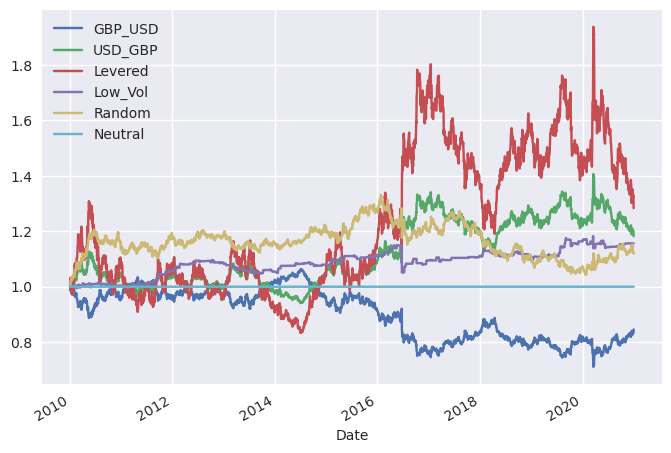

In [6]:
returns.cumsum().apply(np.exp).plot()

In [7]:
simple = np.exp(returns) - 1# simple returns for leverage calculation
simple

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002730,0.002737,0.006295,0.0,0.002737,0.0
2010-01-03,-0.001725,0.001728,0.003975,0.0,0.000000,0.0
2010-01-04,-0.005770,0.005803,0.013347,0.0,0.005803,0.0
2010-01-05,0.001688,-0.001686,-0.003877,0.0,0.001688,0.0
2010-01-06,-0.005431,0.005461,0.012560,0.0,0.005461,0.0
...,...,...,...,...,...,...
2020-12-23,0.005017,-0.004992,-0.011481,0.0,-0.004992,0.0
2020-12-27,-0.008243,0.008312,0.019118,0.0,-0.008243,0.0
2020-12-28,0.003807,-0.003792,-0.008722,0.0,-0.003792,0.0


## Leverage & Margin trading

In [8]:
symbol = "USD_GBP"

In [9]:
leverage = 2 # equivalent to a margin of 50%

In [10]:
instr = simple[symbol].to_frame().copy()
instr

,USD_GBP
Date,
2010-01-02,0.002737
2010-01-03,0.001728
2010-01-04,0.005803
2010-01-05,-0.001686
2010-01-06,0.005461
...,...
2020-12-23,-0.004992
2020-12-27,0.008312
2020-12-28,-0.003792


In [11]:
instr["Lev_Returns"] = instr[symbol].mul(leverage) # multiply simple returns with leverage
instr

,USD_GBP,Lev_Returns
Date,,
2010-01-02,0.002737,0.005474
2010-01-03,0.001728,0.003457
2010-01-04,0.005803,0.011606
2010-01-05,-0.001686,-0.003371
2010-01-06,0.005461,0.010922
...,...,...
2020-12-23,-0.004992,-0.009984
2020-12-27,0.008312,0.016624
2020-12-28,-0.003792,-0.007584


In [12]:
instr["Lev_Returns"] = np.where(instr["Lev_Returns"] < -1, -1, instr["Lev_Returns"]) # loss limited to 100%
instr

,USD_GBP,Lev_Returns
Date,,
2010-01-02,0.002737,0.005474
2010-01-03,0.001728,0.003457
2010-01-04,0.005803,0.011606
2010-01-05,-0.001686,-0.003371
2010-01-06,0.005461,0.010922
...,...,...
2020-12-23,-0.004992,-0.009984
2020-12-27,0.008312,0.016624
2020-12-28,-0.003792,-0.007584


<Axes: xlabel='Date'>

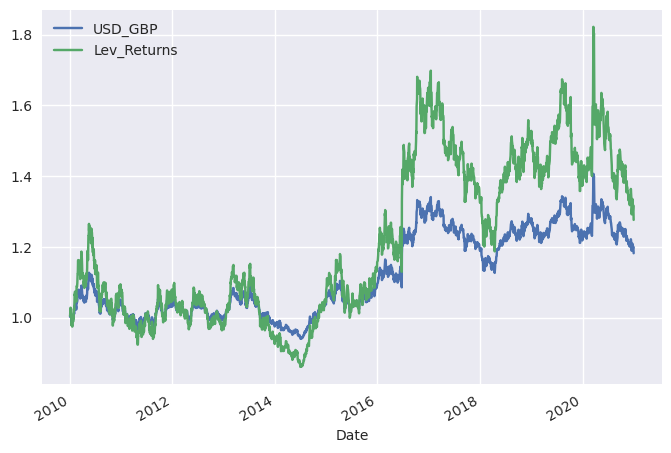

In [13]:
instr.add(1).cumprod().plot()

## Finding the optimal degree of leverage

We can either use the kelly criterion or we just run the backtest for many different leverage settings

In [14]:
leverage = np.arange(1, 5, 0.01)
leverage

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.

In [15]:
multiple = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    multiple.append(levered_returns.add(1).prod())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Multiple":multiple})

In [16]:
results.set_index("Leverage", inplace = True)
results

,Multiple
Leverage,
1.00,1.182261
1.01,1.183697
1.02,1.185124
1.03,1.186542
1.04,1.187952
...,...
4.95,0.950938
4.96,0.948744
4.97,0.946546


In [17]:
results.min()

Multiple    0.942142
dtype: float64

In [18]:
max_multiple = results.max()
max_multiple

Multiple    1.283638
dtype: float64

In [19]:
optimal_lev = results.idxmax()
optimal_lev

Multiple    2.35
dtype: float64

Text(0.5, 1.0, 'Optimal degree of leverage')

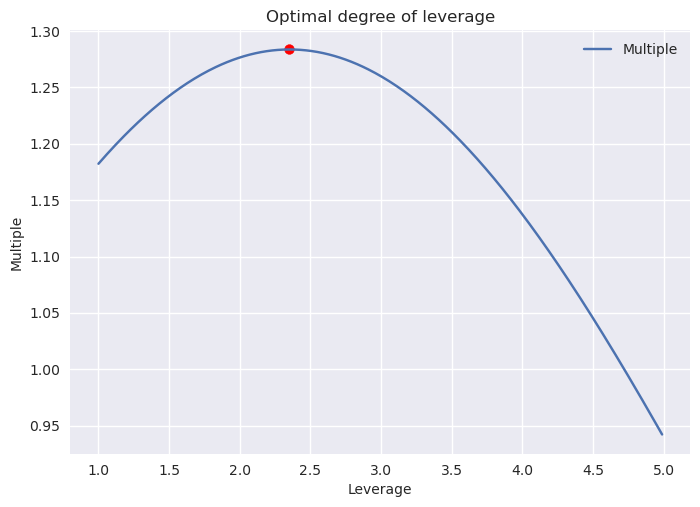

In [20]:
results.plot()
plt.scatter(x = optimal_lev, y = max_multiple, color = "r", s= 50)
plt.xlabel("Leverage")
plt.ylabel("Multiple")
plt.title("Optimal degree of leverage")

## Kelly Criterion

The Kelly Criterion closely approaches the true/correct value **if**:
- simple returns are used (Yes)
- dataset is sufficiently large (OK)

In [21]:
instr = simple[symbol].to_frame().copy()
instr

,USD_GBP
Date,
2010-01-02,0.002737
2010-01-03,0.001728
2010-01-04,0.005803
2010-01-05,-0.001686
2010-01-06,0.005461
...,...
2020-12-23,-0.004992
2020-12-27,0.008312
2020-12-28,-0.003792


In [22]:
mu = instr.mean() # mean return (simple)
mu

USD_GBP    0.000068
dtype: float64

In [23]:
var = instr.var() # variance of returns (simple)

In [24]:
kelly = mu / var
kelly

USD_GBP    2.316484
dtype: float64

Good approximation by **Kelly Criterion**

## Impact of Leverage on Reward & Risk

### Reward 1: Mean of simple returns

In [31]:
leverage = np.arange(1, 5, 0.01)

In [32]:
mu = []
sigma = []
sharpe = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    mu.append(levered_returns.mean())
    sigma.append(levered_returns.std())
    sharpe.append(levered_returns.mean() / levered_returns.std())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Mean":mu, "Std": sigma,"Sharpe": sharpe})

In [33]:
results.set_index("Leverage", inplace = True)
results

,Mean,Std,Sharpe
Leverage,,,
1.00,0.000068,0.005415,0.012544
1.01,0.000069,0.005469,0.012544
1.02,0.000069,0.005523,0.012544
1.03,0.000070,0.005577,0.012544
1.04,0.000071,0.005631,0.012544
...,...,...,...
4.95,0.000336,0.026804,0.012544
4.96,0.000337,0.026858,0.012544
4.97,0.000338,0.026912,0.012544


array([<Axes: xlabel='Leverage'>, <Axes: xlabel='Leverage'>,
       <Axes: xlabel='Leverage'>], dtype=object)

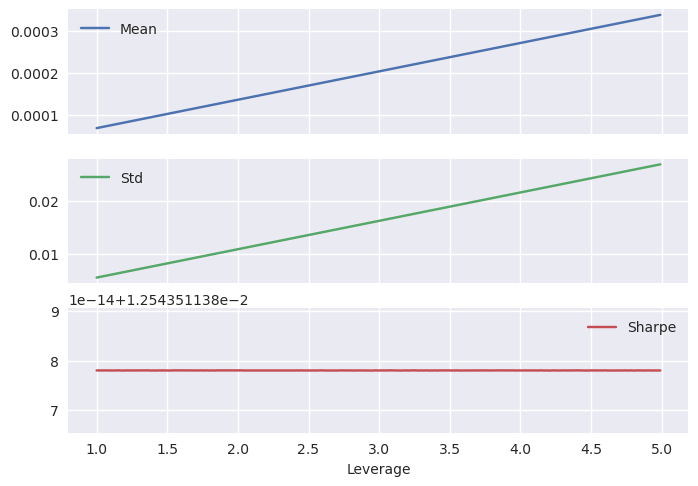

In [36]:
results.plot(subplots = True)

#### Mean of simple returns is steadily increasing with higher leverage (misleading)
#### Sharpe Ratio remains constant (misleading)

### Reard 2: Mean of log returns

In [37]:
leverage = np.arange(1, 5, 0.01)

In [38]:
mu = []
sigma = []
sharpe = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    levered_returns = np.log(levered_returns + 1) # convert to log returns
    mu.append(levered_returns.mean())
    sigma.append(levered_returns.std())
    sharpe.append(levered_returns.mean() / levered_returns.std())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Mean":mu, "Std": sigma,"Sharpe": sharpe})

In [39]:
results.set_index("Leverage", inplace = True)
results

,Mean,Std,Sharpe
Leverage,,,
1.00,0.000053,0.005395,0.009887
1.01,0.000054,0.005448,0.009861
1.02,0.000054,0.005502,0.009834
1.03,0.000054,0.005556,0.009807
1.04,0.000055,0.005610,0.009781
...,...,...,...
4.95,-0.000016,0.026445,-0.000606
4.96,-0.000017,0.026498,-0.000633
4.97,-0.000018,0.026551,-0.000659


array([<Axes: xlabel='Leverage'>, <Axes: xlabel='Leverage'>,
       <Axes: xlabel='Leverage'>], dtype=object)

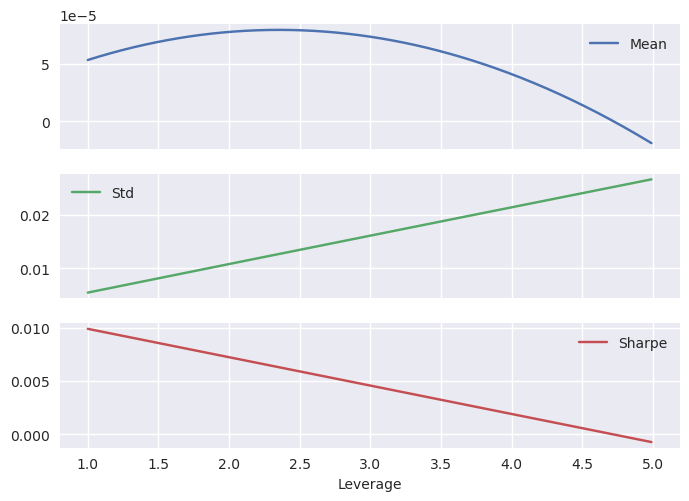

In [41]:
results.plot(subplots = True)

- Maximum Return @ Kelly
- Sharpe Ratio steadily decreasing with higher leverage
- Leverage amplifies losses more than it amplifies gains
- Don't use leverage if your goal is to maximise risk-adjusted returns
- If you want to increase return/income with leverage it has trade offs
**Rule of thumb: leverage shouldn't be higher than Half Kelly.**

## Putting everything together

In [43]:
def kelly_criterion(series): # assuming log returns
    series = np.exp(series) - 1
    if series.var() == 0:
        return np.nan
    else:
        return series.mean() / series.var()

In [44]:
returns.apply(kelly_criterion).sort_values(ascending=False)

Low_Vol    8.949907
USD_GBP    2.316484
Random     2.195337
Levered    1.007167
GBP_USD   -1.343006
Neutral         NaN
dtype: float64

In [45]:
kelly_criterion(returns.Low_Vol)

8.949907321352432

Side note: for "Low_Vol" it's not a good aproximation because:
- majority of daily returns is zero (neutral)
- only very few "real" observations (non-normal)

In [47]:
returns.Low_Vol.value_counts()

 0.000000    2826
-0.001950       1
 0.001149       1
 0.011488       1
 0.001376       1
             ... 
 0.002467       1
-0.002912       1
-0.005013       1
 0.003929       1
 0.002567       1
Name: Low_Vol, Length: 314, dtype: int64